In [124]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier

In [55]:
df = pd.read_excel('water_quality.xlsx', na_values =["?", ".", " "])

In [56]:
df.head(20)

,carbon_level,water_ph_level,water_hardness,other_solid_precipitate,Chlorine_compounds,soluble_sulphates,electrical_conductivity,TMH,solid_suspensions,drinkability
0,14.613423,8.107244,228.171859,833.154328,6.185948,246.942611,369.903199,101.351525,4.688271,1
1,14.805198,6.729191,178.493632,1913.653795,5.632940,NaN,341.774778,64.129155,5.112254,1
2,12.950545,5.762552,184.847487,948.486842,6.302264,347.775154,449.435376,65.839742,2.906589,0
3,11.420910,4.595608,204.859660,574.400527,6.371345,NaN,631.822078,70.449003,3.978920,1
4,15.213176,NaN,194.166625,298.008404,7.266598,399.282081,427.896907,34.471753,2.909606,0
5,15.627514,6.548797,205.168161,2054.710365,3.777648,NaN,327.967343,51.850366,4.197305,0
6,17.273966,5.716756,197.104210,162.993745,8.702061,287.012564,345.083936,58.411515,4.080675,0
7,15.193704,NaN,240.036279,306.801733,8.643089,339.158877,487.434555,88.785469,3.980920,1
8,14.732291,5.099932,189.665937,2455.114382,4.368152,NaN,334.512306,49.985679,5.159301,1
9,12.010676,7.603775,214.682778,46.832971,10.999995,398.920869,321.069074,58.100707,3.584985,1


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   carbon_level             3276 non-null   float64
 1   water_ph_level           2785 non-null   float64
 2   water_hardness           3276 non-null   float64
 3   other_solid_precipitate  3276 non-null   float64
 4   Chlorine_compounds       3276 non-null   float64
 5   soluble_sulphates        2495 non-null   float64
 6   electrical_conductivity  3276 non-null   float64
 7   TMH                      3114 non-null   float64
 8   solid_suspensions        3276 non-null   float64
 9   drinkability             3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [58]:
df.isnull().sum()

carbon_level                 0
water_ph_level             491
water_hardness               0
other_solid_precipitate      0
Chlorine_compounds           0
soluble_sulphates          781
electrical_conductivity      0
TMH                        162
solid_suspensions            0
drinkability                 0
dtype: int64

In [62]:
#Imputing the null values with mean
mean_waterPh = df['water_ph_level'].mean()
df['water_ph_level'].fillna(value=mean_waterPh, inplace=True)
mean_sulphates = df['soluble_sulphates'].mean()
df['soluble_sulphates'].fillna(value=mean_sulphates, inplace=True)
mean_TMH = df['TMH'].mean()
df['TMH'].fillna(value=mean_sulphates, inplace=True)

In [64]:
df['water_ph_level']= df['water_ph_level'].astype('float')
df['soluble_sulphates']= df['soluble_sulphates'].astype('float')
df['TMH'] = df['TMH'].astype('float')

In [65]:
df.head()

,carbon_level,water_ph_level,water_hardness,other_solid_precipitate,Chlorine_compounds,soluble_sulphates,electrical_conductivity,TMH,solid_suspensions,drinkability
0,14.613423,8.107244,228.171859,833.154328,6.185948,246.942611,369.903199,101.351525,4.688271,1
1,14.805198,6.729191,178.493632,1913.653795,5.632940,333.775777,341.774778,64.129155,5.112254,1
2,12.950545,5.762552,184.847487,948.486842,6.302264,347.775154,449.435376,65.839742,2.906589,0
3,11.420910,4.595608,204.859660,574.400527,6.371345,333.775777,631.822078,70.449003,3.978920,1
4,15.213176,7.080795,194.166625,298.008404,7.266598,399.282081,427.896907,34.471753,2.909606,0


In [66]:
df.describe()

,carbon_level,water_ph_level,water_hardness,other_solid_precipitate,Chlorine_compounds,soluble_sulphates,electrical_conductivity,TMH,solid_suspensions,drinkability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,14.284970,7.080795,196.369496,886.242335,7.122277,333.775777,426.205111,79.618355,3.966786,0.390110
std,3.308162,1.469956,32.879761,1102.780778,1.583085,36.142612,80.824064,60.084944,0.780382,0.487849
min,2.200000,0.000000,47.432000,5.256757,0.352000,129.000000,181.483754,0.738000,1.450000,0.000000
25%,12.065801,6.277673,176.850538,332.770063,6.127421,317.094638,365.734414,56.647656,3.439711,0.000000
50%,14.218338,7.080795,196.967627,577.023297,7.130299,333.775777,421.884968,67.623691,3.955028,0.000000
75%,16.557652,7.870050,216.667456,1021.350263,8.114887,350.385756,481.792304,79.178816,4.500320,1.000000
max,28.300000,14.000000,323.124000,14348.187384,13.127000,481.030642,753.342620,333.775777,6.739000,1.000000


In [67]:
df['drinkability'].value_counts()  

0    1998
1    1278
Name: drinkability, dtype: int64

The dataset is a balanced dataset

### EDA

<AxesSubplot:>

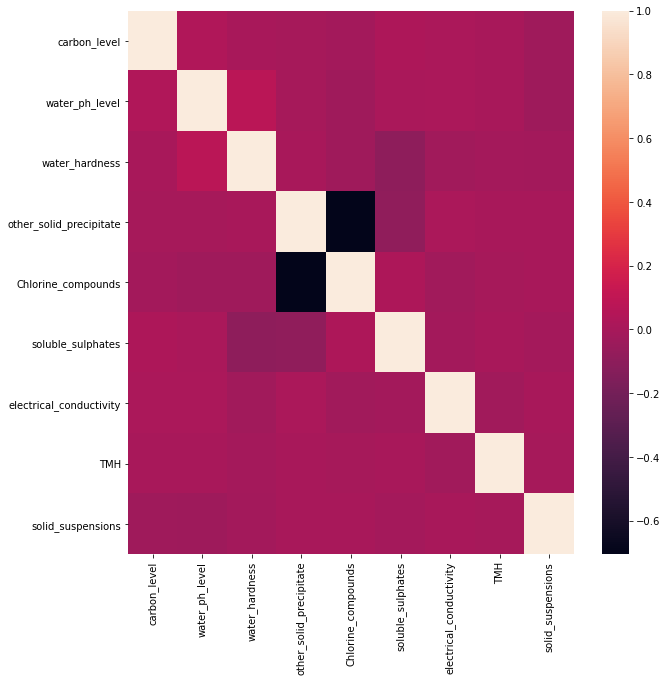

In [88]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.drop('drinkability', axis=1).corr())

Other solid precipitates and chlorine components are highly correlated
dropping Other solid precipitates

In [91]:
df.drop('other_solid_precipitate', axis=1, inplace=True)

<AxesSubplot:>

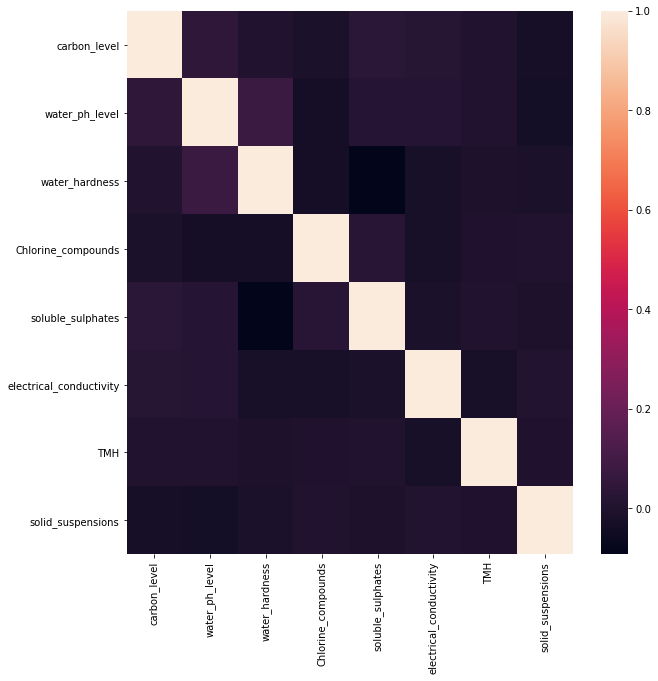

In [92]:
plt.figure(figsize=(10,10))
sns.heatmap(data=df.drop('drinkability', axis=1).corr())

In [122]:
'''

plt.figure(figsize=(20,10))
for i in range(1,5):
    plt.subplot(2,2,i)
    sns.distplot(df[:,i-1])
 '''

'\n\nplt.figure(figsize=(20,10))\nfor i in range(1,5):\n    plt.subplot(2,2,i)\n    sns.distplot(df[:,i-1])\n '

### Splitting the dataset into train and test

In [104]:
x= df.iloc[:,:8]
y =df['drinkability']
x_train, x_test, y_train, y_test = tts(x, y, train_size=0.7, random_state=1, stratify=y)

In [105]:
x_train

,carbon_level,water_ph_level,water_hardness,Chlorine_compounds,soluble_sulphates,electrical_conductivity,TMH,solid_suspensions
2375,12.877960,8.039697,233.856219,8.293018,333.775777,461.209780,68.750868,3.826063
1467,13.984156,7.080795,250.572683,7.287605,345.109962,426.103715,60.159730,6.099632
34,17.130158,8.903734,194.216275,5.566896,323.424362,317.349244,61.428791,4.365170
142,14.154110,5.873157,153.673381,9.752879,319.356743,352.456041,65.234629,5.120888
1363,17.517283,8.828094,196.562853,8.940380,379.914286,486.863267,61.182844,3.793318
...,...,...,...,...,...,...,...,...
720,19.578273,7.091886,221.191476,5.134960,333.775777,515.059986,62.627330,5.116407
2054,16.548438,7.381758,203.460302,11.129154,475.737460,361.342496,55.132546,3.338022
2849,12.896953,6.106760,211.454489,8.316897,348.776719,389.591440,85.358049,3.924967
1338,11.440747,7.717077,211.681327,6.987854,268.944957,495.914919,85.051546,4.967976


### Scaing the data

In [106]:
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
X_train = pd.DataFrame(data=x_train_scaled, columns = list(x_train.columns))
x_test_scaled = scaler.transform(x_test)
X_test = pd.DataFrame(data=x_test_scaled, columns = list(x_test.columns))



# KNN Classifier

In [107]:
#model = RandomizedSearchCV(knn,params,cv=cvals)
knn= KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train ,y_train)
y_pred = knn.predict(X_test)

### Confusion matrix, Classification Report and Accuracy Score

In [108]:
print(confusion_matrix(y_test , y_pred))
print(classification_report(y_test , y_pred))
print(accuracy_score(y_test,y_pred)*100) 

[[456 144]
 [243 140]]
              precision    recall  f1-score   support

           0       0.65      0.76      0.70       600
           1       0.49      0.37      0.42       383

    accuracy                           0.61       983
   macro avg       0.57      0.56      0.56       983
weighted avg       0.59      0.61      0.59       983

60.63072227873856


# Naive Bayes Classifier

In [109]:
from sklearn.model_selection import cross_val_score
nb = GaussianNB()

nb.fit(X_train, y_train)
y_pred = nb.predict(X_test)

In [110]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[525  75]
 [297  86]]
              precision    recall  f1-score   support

           0       0.64      0.88      0.74       600
           1       0.53      0.22      0.32       383

    accuracy                           0.62       983
   macro avg       0.59      0.55      0.53       983
weighted avg       0.60      0.62      0.57       983

62.156663275686675


In [111]:
logreg =LogisticRegression()
#logreg.fit(upsampled_X,upsampled_Y )
logreg.fit(X_train ,y_train)
y_pred = logreg.predict(X_test)

In [112]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[600   0]
 [383   0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76       600
           1       0.00      0.00      0.00       383

    accuracy                           0.61       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.37      0.61      0.46       983

61.03763987792472


C:\IDE\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [113]:
decision_tree =DecisionTreeClassifier()
#decision_tree.fit(upsampled_X,upsampled_Y )
decision_tree.fit(X_train ,y_train)
y_pred = decision_tree.predict(X_test)

In [114]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred)*100)

[[386 214]
 [200 183]]
              precision    recall  f1-score   support

           0       0.66      0.64      0.65       600
           1       0.46      0.48      0.47       383

    accuracy                           0.58       983
   macro avg       0.56      0.56      0.56       983
weighted avg       0.58      0.58      0.58       983

57.88402848423194


In [132]:
'''
boost_tree = AdaBoostClassifier(base_estimator=tree, n_estimators=150, random_state=1234, algorithm:{'SAMME'})
'''


"\nboost_tree = AdaBoostClassifier(base_estimator=tree, n_estimators=150, random_state=1234, algorithm:{'SAMME'})\n"

In [129]:
'''

boost_tree.fit(X_train, y_train)
confusion_matrix(y_test, boost_tree.predict(X_test))
'''

'\n\nboost_tree.fit(X_train, y_train)\nconfusion_matrix(y_test, boost_tree.predict(X_test))\n'

#### Precision  Recall, Confusion matrics can be metrics that can be used to analyse results